# Sharpe Ratios for the Banking Sector

## Banking Sector 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers=['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS',
        'INDUSINDBK.NS', 'FEDERALBNK.NS', 'IDFCFIRSTB.NS' ]

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS  SBIN.NS  \
Date                                                                        
2017-01-02          NaN           NaN           NaN          NaN      NaN   
2017-01-03     -0.00601       0.00972      -0.00427      0.01675  0.00534   
2017-01-04     -0.00370      -0.01297      -0.02269     -0.00472 -0.00817   
2017-01-05      0.00059       0.02449       0.00482      0.01092  0.01009   
2017-01-06      0.00628       0.00350       0.02561     -0.00622  0.00224   
...                 ...           ...           ...          ...      ...   
2020-12-24      0.01559       0.01976       0.02075      0.02996  0.01464   
2020-12-28      0.01127       0.01275       0.01443      0.01221  0.03129   
2020-12-29      0.01016       0.01673       0.00523      0.02032  0.00981   
2020-12-30      0.00371      -0.00009       0.00933     -0.00809 -0.00360   
2020-12-31      0.00265       0.01191      -0.01108     -0.00744 -0.00704   

            INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
Date                                                     
2017-01-02            NaN            NaN            NaN  
2017-01-03        0.01209        0.00151       -0.00082  
2017-01-04       -0.00041       -0.00605       -0.01399  
2017-01-05        0.02491        0.02662        0.01252  
2017-01-06        0.01463       -0.00444        0.00000  
...                   ...            ...            ...  
2020-12-24       -0.00298        0.01479        0.00000  
2020-12-28        0.01659        0.03374        0.02925  
2020-12-29        0.05300        0.00000       -0.00677  
2020-12-30       -0.01517       -0.00223       -0.00136  
2020-12-31       -0.00456       -0.00818        0.01091  

[988 rows x 8 columns]

In [2]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

HDFCBANK.NS      0.001036
ICICIBANK.NS     0.001159
KOTAKBANK.NS     0.001220
AXISBANK.NS      0.000664
SBIN.NS          0.000418
INDUSINDBK.NS    0.000329
FEDERALBNK.NS    0.000391
IDFCFIRSTB.NS   -0.000130
dtype: float64
               HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  AXISBANK.NS   SBIN.NS  \
HDFCBANK.NS       0.000253      0.000196      0.000190     0.000197  0.000162   
ICICIBANK.NS      0.000196      0.000541      0.000187     0.000411  0.000388   
KOTAKBANK.NS      0.000190      0.000187      0.000356     0.000209  0.000147   
AXISBANK.NS       0.000197      0.000411      0.000209     0.000631  0.000348   
SBIN.NS           0.000162      0.000388      0.000147     0.000348  0.000583   
INDUSINDBK.NS     0.000243      0.000344      0.000262     0.000420  0.000291   
FEDERALBNK.NS     0.000198      0.000340      0.000197     0.000360  0.000334   
IDFCFIRSTB.NS     0.000167      0.000292      0.000176     0.000322  0.000314   

               INDUSINDBK.NS  FEDERALBNK.NS  ID

In [3]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [5]:
result

array([[0.18839768, 0.29770848, 0.63282603, ..., 0.13304519, 0.13088531,
        0.08025942],
       [0.14255487, 0.28733133, 0.4961341 , ..., 0.09942555, 0.22683196,
        0.12987108],
       [0.14492852, 0.29713639, 0.48775083, ..., 0.14465628, 0.19296512,
        0.15591524],
       ...,
       [0.18163819, 0.26883712, 0.67564402, ..., 0.05524044, 0.0884954 ,
        0.14690967],
       [0.16786783, 0.28144042, 0.59645956, ..., 0.21242469, 0.04053531,
        0.12594099],
       [0.15277274, 0.28712627, 0.53207508, ..., 0.10659865, 0.19980444,
        0.17332952]])

In [6]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'HDFCBANK.NS',
 'ICICIBANK.NS',
 'KOTAKBANK.NS',
 'AXISBANK.NS',
 'SBIN.NS',
 'INDUSINDBK.NS',
 'FEDERALBNK.NS',
 'IDFCFIRSTB.NS']

In [7]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe  HDFCBANK.NS  ICICIBANK.NS  KOTAKBANK.NS  \
0     0.188398  0.297708  0.632826     0.170013      0.350965      0.008185   
1     0.142555  0.287331  0.496134     0.039515      0.023612      0.217170   
2     0.144929  0.297136  0.487751     0.000393      0.070778      0.214790   
3     0.128755  0.293172  0.439179     0.125005      0.130215      0.035892   
4     0.168766  0.302545  0.557820     0.050524      0.156146      0.143934   
...        ...       ...       ...          ...           ...           ...   
9995  0.208809  0.254257  0.821252     0.319808      0.202693      0.174960   
9996  0.164505  0.303947  0.541228     0.004081      0.021795      0.294090   
9997  0.181638  0.268837  0.675644     0.118587      0.153519      0.232347   
9998  0.167868  0.281440  0.596460     0.189049      0.129552      0.146680   
9999  0.152773  0.287126  0.532075     0.100556      0.094533      0.169200   

      AXISBANK.NS   SBIN.NS  INDUSINDBK.NS  FEDERALBNK.NS  IDFCFIRSTB.NS  
0        0.069806  0.056841       0.133045       0.130885       0.080259  
1        0.071832  0.191742       0.099426       0.226832       0.129871  
2        0.144705  0.075798       0.144656       0.192965       0.155915  
3        0.122100  0.275118       0.027759       0.035401       0.248509  
4        0.153284  0.051904       0.170215       0.224272       0.049720  
...           ...       ...            ...            ...            ...  
9995     0.005974  0.069139       0.052974       0.040744       0.133708  
9996     0.124798  0.048739       0.229526       0.233476       0.043495  
9997     0.069654  0.135247       0.055240       0.088495       0.146910  
9998     0.026776  0.129041       0.212425       0.040535       0.125941  
9999     0.122526  0.033453       0.106599       0.199804       0.173330  

[10000 rows x 11 columns]

In [8]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean             0.265321
sd               0.261386
Sharpe           1.015053
HDFCBANK.NS      0.201530
ICICIBANK.NS     0.319078
KOTAKBANK.NS     0.329826
AXISBANK.NS      0.087760
SBIN.NS          0.034110
INDUSINDBK.NS    0.005065
FEDERALBNK.NS    0.001024
IDFCFIRSTB.NS    0.021606
Name: 1101, dtype: float64


In [9]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean             0.212962
sd               0.246904
Sharpe           0.862528
HDFCBANK.NS      0.358518
ICICIBANK.NS     0.099772
KOTAKBANK.NS     0.297416
AXISBANK.NS      0.022683
SBIN.NS          0.002716
INDUSINDBK.NS    0.013951
FEDERALBNK.NS    0.001872
IDFCFIRSTB.NS    0.203072
Name: 2052, dtype: float64


In [10]:
result.iloc[512]

mean             0.140379
sd               0.289863
Sharpe           0.484294
HDFCBANK.NS      0.153717
ICICIBANK.NS     0.090100
KOTAKBANK.NS     0.071767
AXISBANK.NS      0.133335
SBIN.NS          0.076853
INDUSINDBK.NS    0.114130
FEDERALBNK.NS    0.181189
IDFCFIRSTB.NS    0.178908
Name: 512, dtype: float64

In [11]:
result.iloc[3173]

mean             0.136517
sd               0.302275
Sharpe           0.451630
HDFCBANK.NS      0.117775
ICICIBANK.NS     0.172787
KOTAKBANK.NS     0.015793
AXISBANK.NS      0.191608
SBIN.NS          0.026435
INDUSINDBK.NS    0.021269
FEDERALBNK.NS    0.218759
IDFCFIRSTB.NS    0.235574
Name: 3173, dtype: float64

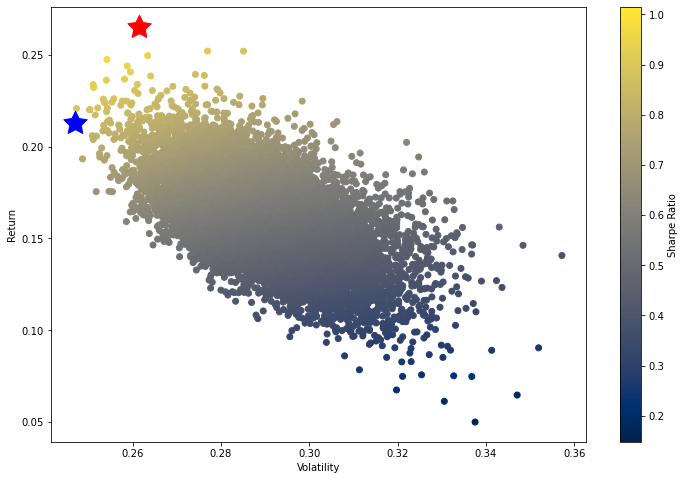

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

#plt.title('Efficient Frontier - Banking Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()